In [1]:
from minority_report.clean_data import CleanData
from minority_report.scaling import Scaling

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

#from scipy.interpolate import griddata

In [58]:
df = Scaling()
df.load_data().head()

,precinct_number,offense_type,crime_completed,offense_level,premise_desc,premise,jurisdiction,park_name,suspect_age,suspect_race,suspect_sex,latitude,longitude,metro,victim_age,victim_race,victim_sex,period,borough,patrol_borough
0,73,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NOT PARK,25-44,BLACK,M,40.664239,-73.908425,NOT SUBWAY,<18,BLACK,M,2015-02-11 15:00:00,BROOKLYN,PATROL BORO BKLYN NORTH
1,69,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.644590,-73.892672,NOT SUBWAY,45-64,BLACK,F,2012-03-17 10:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH
2,71,HARRASSMENT 2,COMPLETED,VIOLATION,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,NOT PARK,<18,BLACK,M,40.658758,-73.942435,NOT SUBWAY,18-24,BLACK,M,2016-10-27 13:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH
3,112,RAPE,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,WHITE HISPANIC,M,40.722364,-73.851474,NOT SUBWAY,25-44,WHITE,F,2014-11-27 19:00:00,QUEENS,PATROL BORO QUEENS NORTH
4,24,GRAND LARCENY,COMPLETED,FELONY,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.793465,-73.968950,NOT SUBWAY,45-64,WHITE,F,2013-12-11 13:00:00,MANHATTAN,PATROL BORO MAN NORTH


In [ ]:
#df.data['coord'] = [(lon, lat) for lon, lat in zip(df.data['longitude'], df.data['latitude'])]

In [3]:
inf = df.data['period'] > datetime(2016, 10, 1, 0, 0, 0)
sup = df.data['period'] < datetime(2016, 11, 1, 0, 0, 0)
sample = df.data[ inf & sup ]

# matlab griddata

In [ ]:
#np.sort(sample['period'].unique())

In [ ]:
ind = {time:index for index,time in enumerate(np.sort(sample['period'].unique()))}

sample['time_index'] = sample['period'].map(ind)

In [ ]:
len(sample['time_index'].unique())

In [ ]:
lon = np.array(sample['longitude'])
lat = np.array(sample['latitude'])
#coord = np.array(sample['coord'])
time_index = np.array(sample['time_index'])

In [ ]:
X, Y = np.meshgrid([1,2,3], [2,5,6,8])
XI,YI = np.meshgrid([1,2,3],[4,5,6,7])

In [ ]:
X

In [ ]:
Y

In [ ]:
XI

In [ ]:
YI

In [ ]:
test = griddata((X.ravel(),Y.ravel()), (X**2+Y**2).ravel(), (XI, YI))
test

In [ ]:
(X**2+Y**2).ravel()

In [ ]:
nx, ny = (3, 2)

In [ ]:
ny

In [ ]:
x = np.linspace(0, 1, nx)

y = np.linspace(0, 1, ny)

In [ ]:
x

In [ ]:
y

In [ ]:
xv, yv = np.meshgrid(x, y)

xv
array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

yv
array([[0.,  0.,  0.],
       [1.,  1.,  1.]])

xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays

xv
array([[0. ,  0.5,  1. ]])

yv
array([[0.],
       [1.]])

# Test griddata

In [ ]:
lon_values = np.linspace(-74.25559136315213,-73.70000906387347, 250)
lat_values = np.linspace(40.49611539518921, 40.91553277600008, 250)
time_values = np.linspace(0, sample.shape[0], sample.shape[0])

In [ ]:
# griddata ( à quelle position je le mets (lon, lat), dans quels arrays je le mets(np.zeros))
xq,yq, zq = np.meshgrid(lon_values,lat_values, time_values)


In [ ]:
values = np.ones((len(lon)))
values

In [ ]:
result = griddata((lon, lat,time_index), values, (xq, yq, zq))

# Manually

## Bruno example

In [ ]:
grid_offset_example = np.array([0, 0, 0]) # Where do you start
grid_spacing_example = np.array([1, 1,1]) # What's the space you consider (euclidian here)

In [ ]:
# point in continuous coordinate space
(x1,y1, z1) = (6.778, 9.201, 2.5)
(x2,y2, z2) = (1.8, 3.1, 4.8)
(x3,y3, z3) = (3.2, 9.01, 3.2)
values = np.array([[x1,y1,z1], [x2,y2,z2], [x3,y3,z3]])
print(values)

In [ ]:
# Convert point to index
indexes = np.round((values - grid_offset_example)/grid_spacing_example).astype('int')
indexes

In [ ]:
a = np.zeros((indexes[:,0].max()+1,indexes[:,1].max()+1, indexes[:,2].max()+1))

In [ ]:
X = indexes[:,0]
Y = indexes[:,1]
Z = indexes[:,2]
X,Y,Z

In [ ]:
a[X,Y,Z]=1
a

## for coordinates

In [ ]:
#40.91553277600008
#40.49611539518921
#74.25559136315213,-73.70000906387347

grid_offset = np.array([0, -40.91553277600008,  -74.25559136315213,]) # Where do you start
grid_spacing = np.array([1, 0.005, 0.005]) # What's the space you consider (euclidian here)

In [ ]:
# point in continuous coordinate space
coords = np.array([(t_ind, -lat, lon) for t_ind, lat, lon \
                   in zip(sample['time_index'],sample['latitude'],sample['longitude'])])

In [ ]:
coords

In [ ]:
indexes = np.round((coords - grid_offset)/grid_spacing).astype('int')
indexes

In [ ]:
Z = indexes[:,0]
Y = indexes[:,1]
X = indexes[:,2]

In [ ]:
a = np.zeros((indexes[:,0].max()+1, indexes[:,1].max()+1, indexes[:,2].max()+1))

In [ ]:
a[Z, Y, X]=1

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(a[1], cmap='gray')

In [ ]:
a

In [ ]:
# Convert back index to grid coordiantes
print(grid_offset + indexes * grid_spacing)

## function

In [61]:
def from_meters_to_coords(lat_meters, lon_meters):
    #Position, decimal degrees
    lat = 40
    lon = -73

    #Earth’s radius, sphere
    R=6378137

    #offsets in meters
    dn = lat_meters
    de = lon_meters

    #Coordinate offsets in radians
    dLat = dn/R
    dLon = de/(R*np.cos(np.pi*lat/180))

    #OffsetPosition, decimal degrees
    latO = dLat * 180/np.pi
    lonO = dLon * 180/np.pi 
    return latO, lonO

In [59]:
def from_coord_to_matrix(df, lat_meters, lon_meters, return_spacing=False):
    """
    outputs the 3D matrix of all coordinates for a given bucket height and width
    """
    df=df.copy()
    #add 'time_index' column to df
    ind = {time:index for index,time in enumerate(np.sort(df['period'].unique()))}
    df['time_index'] = df['period'].map(ind)
    
    #initiate matrix
    grid_offset = np.array([0, -40.91553277600008,  -74.25559136315213,]) # Where do you start
    lat_spacing, lon_spacing = from_meters_to_coords(lat_meters, lon_meters )
    grid_spacing = np.array([1, lat_spacing , lon_spacing]) # What's the space you consider (euclidian here)
     
    
    #get points coordinates
    coords = np.array([(t_ind, -lat, lon) for t_ind, lat, lon \
                   in zip(df['time_index'],df['latitude'],df['longitude'])])
    
    
    # Convert point to index
    indexes = np.round((coords - grid_offset)/grid_spacing).astype('int')
    Z = indexes[:,0]
    Y = indexes[:,1]
    X = indexes[:,2]
    
    #virgin matrix
    a = np.zeros((Z.max()+1, Y.max()+1, X.max()+1))
   
    
    a[Z, Y, X]=1
    
    if return_spacing:
        return a, lat_spacing, lon_spacing
    
    return a

In [42]:
def from_matrix_to_coord(indexes, lat_spacing, lon_spacing):
    grid_offset = np.array([0, -40.91553277600008,  -74.25559136315213,]) # Where do you start
    grid_spacing = np.array([1, lat_spacing, lon_spacing]) # What's the space you consider (euclidian here)
    result = grid_offset + indexes * grid_spacing
    return result

## Tests

In [64]:
from_coord_to_matrix(sample, 100, 100, return_spacing=True)

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


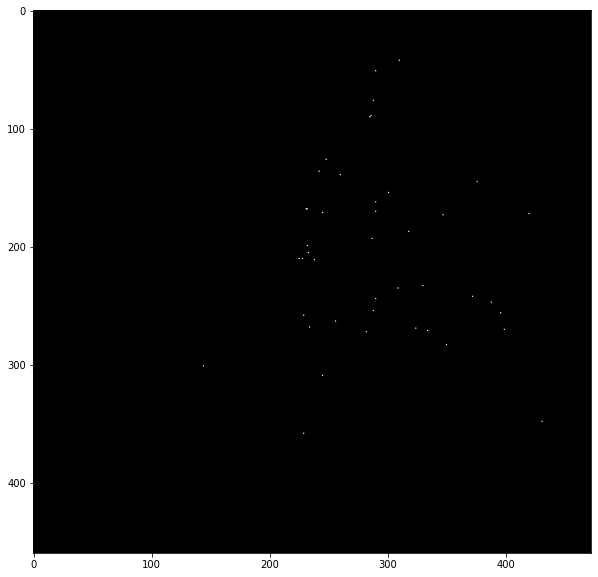

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(img[3], cmap='gray')

In [56]:
img[0].shape

(460, 473)

In [10]:
img.shape

(743, 84, 112)

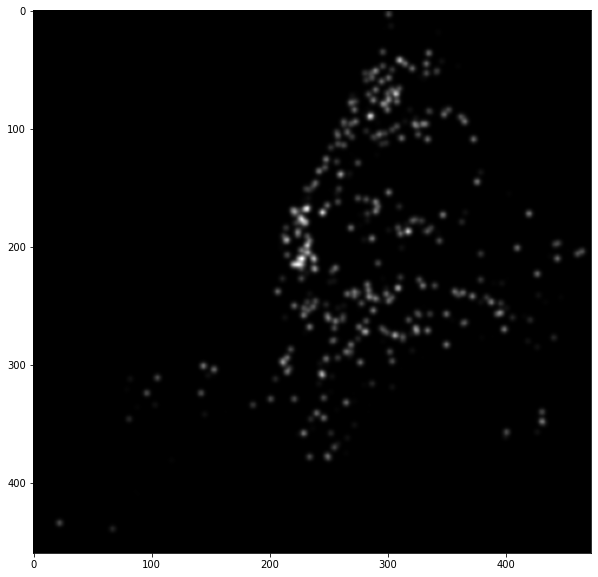

In [57]:
img3D_conv = gaussian_filter(img, sigma=(2,2,2))

plt.figure(figsize=(10,10))
plt.imshow(img3D_conv[3], cmap='gray')

# To do

In [ ]:
# fonctions en mode variables (matrix ET get_X_y)

#ce qu'on veut en entrée, ce qu'on veut en sortie